<a href="https://colab.research.google.com/github/AlexeyTri/MLSeminars/blob/main/MLHSE/HW4/HW4_ver1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [145]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import BisectingKMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from time import time

import plotly.express as px
from time import time

plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

%matplotlib inline
%config InlineBackend.figure_format="retina"

RANDOM_STATE = 42

# Download data

In [1]:
!wget https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
!chmod +x ya.py
!./ya.py https://yadi.sk/d/_WFxgSIuBF06Rg /content/data_HW3

--2023-03-05 09:49:00--  https://gist.githubusercontent.com/Yegorov/dc61c42aa4e89e139cd8248f59af6b3e/raw/20ac954e202fe6a038c2b4bb476703c02fe0df87/ya.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 723 [text/plain]
Saving to: ‘ya.py’

ya.py               100%[===================>]     723  --.-KB/s    in 0s      

2023-03-05 09:49:01 (23.4 MB/s) - ‘ya.py’ saved [723/723]

--2023-03-05 09:49:03--  https://downloader.disk.yandex.ru/disk/5adc72b008cd7d4fc26f1e53219de16e4e77936791392f9a40260c6adc96f480/64049dce/9lLk8YuVilYISK3Fj34iz2f9JoJsdzo-im-cQLBSDIrufiv9DiG4XZgItUEWmo9Y-gpnKAyDLbo2T5uVrhY4sw%3D%3D?uid=0&filename=samsung_HAR.zip&disposition=attachment&hash=r49FYnOZfE1LoxwcXcBoJDLHu%2BKdZ0RDffB8NF31Z6SKMBCGT2N6A6EWbxxlc00Yq/J6bpmRyOJonT3VoXnDag%3D%3D%3A

In [2]:
!unzip samsung_HAR.zip -d samsung_HAR

Archive:  samsung_HAR.zip
   creating: samsung_HAR/samsung_HAR/
  inflating: samsung_HAR/samsung_HAR/samsung_test_labels.txt  
   creating: samsung_HAR/__MACOSX/
   creating: samsung_HAR/__MACOSX/samsung_HAR/
  inflating: samsung_HAR/__MACOSX/samsung_HAR/._samsung_test_labels.txt  
  inflating: samsung_HAR/samsung_HAR/samsung_train_labels.txt  
  inflating: samsung_HAR/__MACOSX/samsung_HAR/._samsung_train_labels.txt  
  inflating: samsung_HAR/samsung_HAR/samsung_test.txt  
  inflating: samsung_HAR/__MACOSX/samsung_HAR/._samsung_test.txt  
  inflating: samsung_HAR/samsung_HAR/samsung_train.txt  
  inflating: samsung_HAR/__MACOSX/samsung_HAR/._samsung_train.txt  
  inflating: samsung_HAR/__MACOSX/._samsung_HAR  


# Task 1.0

In [32]:
df_train = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_train.txt')

In [35]:
df_test = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_test.txt')

In [36]:
df_test = pd.DataFrame(data=df_test.values, columns=df_train.columns)

In [48]:
X = pd.concat([df_train, df_test])

In [23]:
df_test_labels = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_test_labels.txt')

In [29]:
df_train_labels = pd.read_fwf('/content/samsung_HAR/samsung_HAR/samsung_train_labels.txt')

In [49]:
y = pd.concat([df_train_labels, df_test_labels])

# Task 1.1

In [56]:
# how type in dataset
X.dtypes.unique()

array([dtype('float64')], dtype=object)

In [60]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)

In [65]:
X_scaler = pd.DataFrame(data=X_scaler, columns=X.columns)

# Task 1.2

In [163]:
pca = PCA(n_components=0.9, svd_solver='full', random_state=RANDOM_STATE, )
X_pca = pca.fit_transform(X_scaler)

In [157]:
X_pca.shape # 66 components explain our data

(10297, 66)

In [164]:
X_pca = pd.DataFrame(data=X_pca, columns=pca.get_feature_names_out())

# Task 1.3

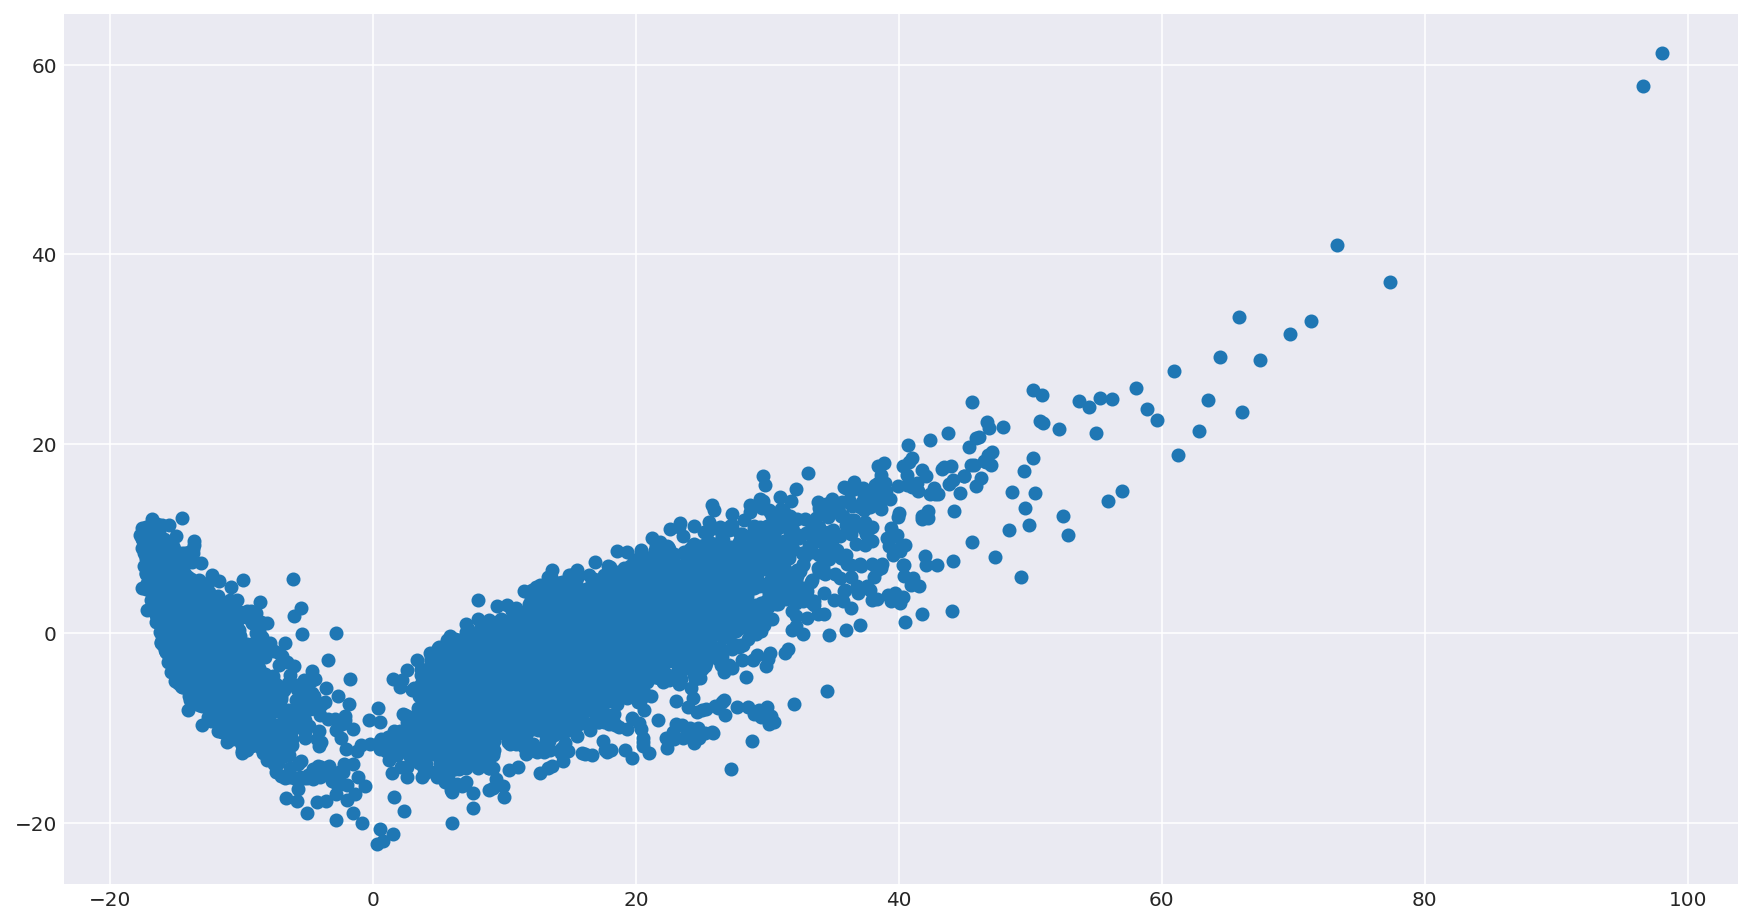

In [82]:
plt.figure(figsize=(15,8))
plt.scatter(X_pca['pca0'], X_pca['pca1'], cmap='virdis')
plt.show()

# Task 1.4

In [89]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=100, random_state = RANDOM_STATE)

In [90]:
%%time
kmeans.fit(X_pca)

CPU times: user 25.1 s, sys: 8.63 s, total: 33.7 s
Wall time: 19.3 s


KMeans(n_clusters=6, n_init=100, random_state=42)

In [165]:
X_pca['labels'] = kmeans.labels_

# Task 1.5

Text(0, 0.5, 'y')

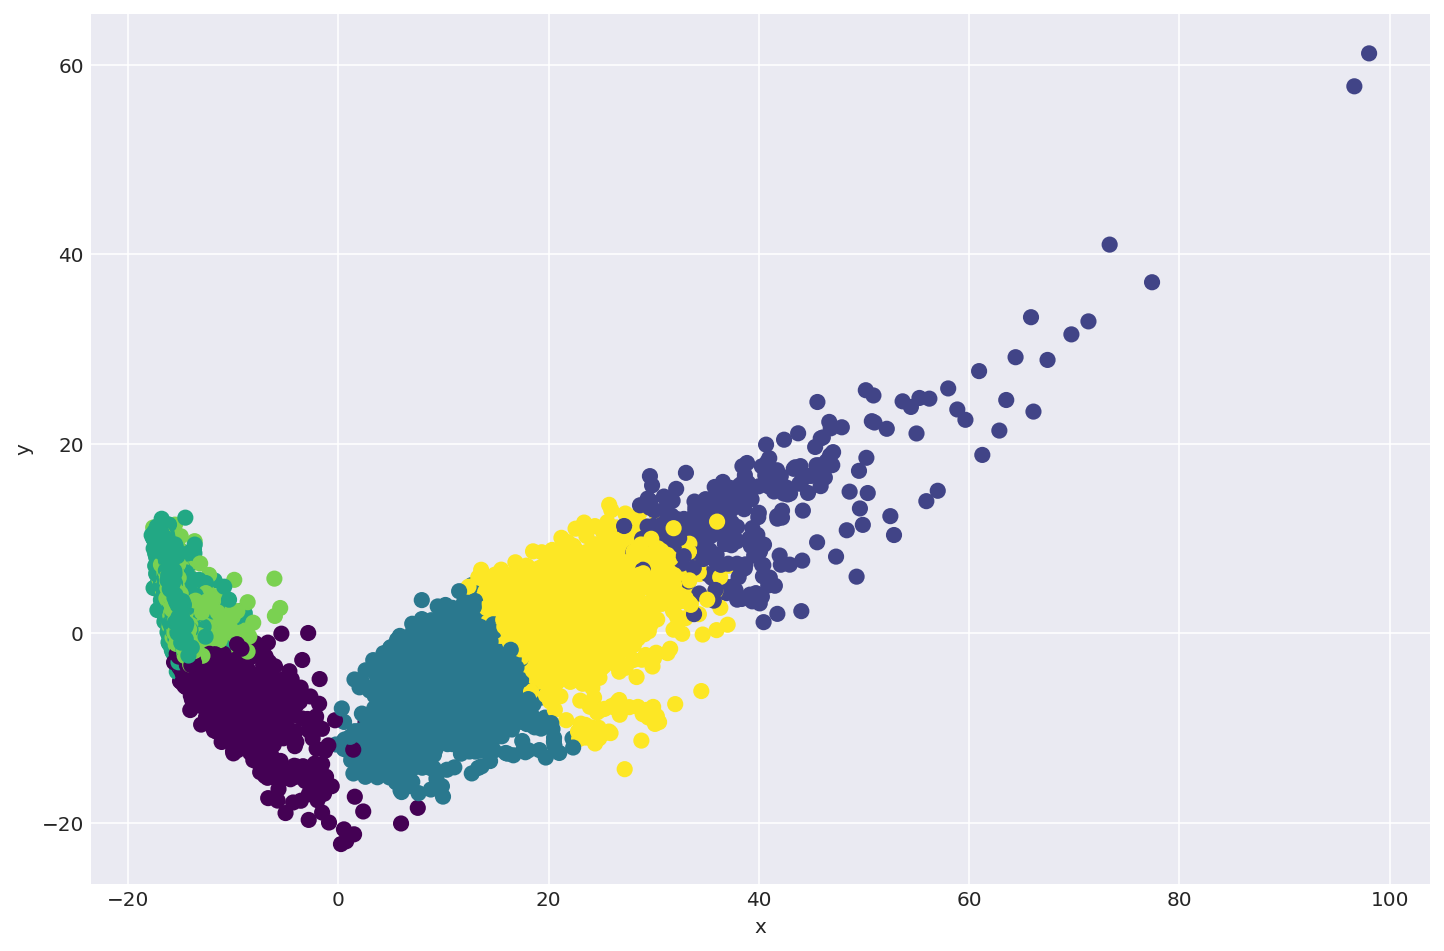

In [100]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca['pca0'], X_pca['pca1'], c=kmeans.labels_, s=50, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [142]:
# make 3d chart, better seen cluster 1 and 2
%%time
px.scatter_3d(X_pca, x='pca0', y='pca1', z='pca2',color=X_pca['labels'])

CPU times: user 188 ms, sys: 1.31 ms, total: 189 ms
Wall time: 217 ms


# Task 1.6

In [148]:
# makesupport function. Code https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#sphx-glr-auto-examples-cluster-plot-kmeans-digits-py
def cluster(name, data, labels):
    t0 = time()
    if name == 'k-means++':
      estimator = KMeans(init='k-means++', n_clusters=6, n_init=100, random_state = RANDOM_STATE).fit(data)
      fit_time = time() - t0
      results = [name, fit_time, estimator.inertia_]
    elif name == 'AgglomerativeClustering':
      estimator = AgglomerativeClustering(n_clusters=6, ).fit(data)
      fit_time = time() - t0
      name = 'AggCl'
      results = [name, fit_time, estimator.n_leaves_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator.labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t\t\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [149]:
print(100 * "_")
print("init\t\ttime\tuniq_param_estim\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
cluster(name='k-means++', data=X_pca, labels=X_pca['labels'])
cluster(name='AgglomerativeClustering', data=X_pca, labels=X_pca['labels'])
print(100 * "_")

____________________________________________________________________________________________________
init		time	uniq_param_estim	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	17.355s	2016119			0.999	0.999	0.999	1.000	0.999	0.142
AggCl    	8.792s	10297			0.764	0.735	0.749	0.670	0.749	0.099
____________________________________________________________________________________________________


# Task 1.7

In [140]:
agl = AgglomerativeClustering(n_clusters=6, ).fit(X_pca)

In [141]:
X_pca['labels_agl'] = agl.labels_

In [143]:
%%time
px.scatter_3d(X_pca, x='pca0', y='pca1', z='pca2',color=X_pca['labels_agl'])

CPU times: user 119 ms, sys: 0 ns, total: 119 ms
Wall time: 135 ms


# Task 1.8

In [190]:
def other_cluster(name, data, labels):
    t0 = time()
    if name == 'BisectingKMeans':
      estimator = BisectingKMeans(n_clusters=6, random_state=RANDOM_STATE).fit(data)
      fit_time = time() - t0
      name = 'BKM'
      results = [name, fit_time, estimator.n_features_in_]
      
    elif name == 'SpectralClustering':
      estimator = SpectralClustering(n_clusters=6, random_state=RANDOM_STATE).fit(data)
      fit_time = time() - t0
      name = 'SpCl'
      results = [name, fit_time, estimator.n_features_in_]
      

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator.labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator.labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t\t\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [193]:
print(100 * "_")
print("init\t\ttime\tn_features\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")
other_cluster(name='BisectingKMeans', data=X_pca, labels=X_pca['labels'])
# other_cluster(name='SpectralClustering', data=X_pca, labels=X_pca['labels'])
print(100 * "_")

____________________________________________________________________________________________________
init		time	n_features	homo	compl	v-meas	ARI	AMI	silhouette
BKM      	0.794s	67			0.686	0.712	0.699	0.543	0.699	0.126
____________________________________________________________________________________________________


In [192]:
clustering = DBSCAN(eps=0.3, min_samples=2).fit(X_pca.values)

AttributeError: ignored

# 2.0

In [195]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving photo_2023-02-19_12-01-18.jpg to photo_2023-02-19_12-01-18.jpg
User uploaded file "photo_2023-02-19_12-01-18.jpg" with length 143126 bytes


In [196]:
from PIL import Image
import numpy as np
im = Image.open("/content/photo_2023-02-19_12-01-18.jpg")
a = np.asarray(im)

In [200]:
x=np.expand_dims(a,axis=0)

In [203]:
import cv2
im = cv2.imread("/content/photo_2023-02-19_12-01-18.jpg")

In [214]:
im[0,1]

array([207, 169,  73], dtype=uint8)